In [1]:
# This is a pipeline to visualize and analyze the results of CellProfiler on RNAprobe experiments

In [2]:
# Import stuff
import os
from utils import data_reader
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# Import the data
# Specify the full path
CPoutput_path = '/mnt/c/Users/herny/Desktop/SWC/Data/Pdym_cell_types/RNAscope/Quantification/2018-05-16/Nuclei.csv'
# Read it in a useful format
CPdata = data_reader.DataReader(CPoutput_path)

In [11]:
CPdata.head()

,ObjectNumber,Children_FinalDots_C2_Count,Children_FinalDots_C3_Count
0,1,0,6
1,2,0,26
2,3,7,0
3,4,7,1
4,5,7,11


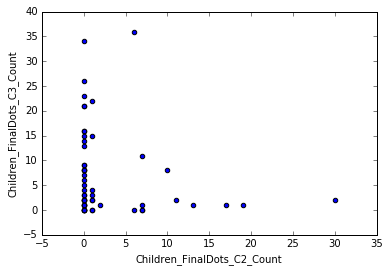

In [10]:
# plot the data
%matplotlib inline
CPdata.plot.scatter(1,2)